In [1]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
import random
import seaborn as sns
import numpy as np
import pandas as pd

# ==== CONFIGURATION ====
NUM_ITEMS = 20000             # Number of items
NUM_AISLES = 20             # Number of aisles
SEED = 42                   # <-- Set your fixed seed here
OUTPUT_FILE = "warehouse_items.csv"

# Optional categories
categories = ['Electronics', 'Apparel', 'Books', 'Home', 'Tools', 'Toys', 'Groceries']

# ==== SET SEED ====
random.seed(SEED)

# ==== GENERATION ====
with open(OUTPUT_FILE, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ItemID", "ItemName", "Category", "Aisle"])

    for i in range(1, NUM_ITEMS + 1):
        item_id = f"ITEM{i:04d}"
        item_name = f"Product_{random.randint(1000, 9999)}"
        category = random.choice(categories)
        aisle = f"Aisle-{random.randint(1, NUM_AISLES)}"
        writer.writerow([item_id, item_name, category, aisle])

print(f"[Seed={SEED}] Generated {NUM_ITEMS} items across {NUM_AISLES} aisles in '{OUTPUT_FILE}'.")


[Seed=42] Generated 20000 items across 20 aisles in 'warehouse_items.csv'.


In [2]:
# ==== CONFIG ====
INPUT_FILE = "warehouse_items.csv"

# ==== READ CSV ====
items = []
categories = []
aisles = []

with open(INPUT_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        items.append(row['ItemID'])
        categories.append(row['Category'])
        aisles.append(row['Aisle'])

# ==== BASIC STATISTICS ====
total_items = len(items)
unique_items = len(set(items))
unique_categories = set(categories)
unique_aisles = set(aisles)

category_count = Counter(categories)
aisle_count = Counter(aisles)

most_common_category = category_count.most_common(1)[0]
least_common_category = category_count.most_common()[-1]

most_common_aisle = aisle_count.most_common(1)[0]
least_common_aisle = aisle_count.most_common()[-1]

# ==== PRINT SUMMARY ====
print("📦 Warehouse Item Statistics")
print("="*40)
print(f"Total items:              {total_items}")
print(f"Unique ItemIDs:           {unique_items}")
print(f"Number of Categories:     {len(unique_categories)}")
print(f"Categories:               {sorted(unique_categories)}")
print(f"Number of Aisles:         {len(unique_aisles)}")
print(f"Aisles:                   {sorted(unique_aisles)}")
print()
print(f"Most Common Category:     {most_common_category[0]} ({most_common_category[1]} items)")
print(f"Least Common Category:    {least_common_category[0]} ({least_common_category[1]} items)")
print(f"Most Populated Aisle:     {most_common_aisle[0]} ({most_common_aisle[1]} items)")
print(f"Least Populated Aisle:    {least_common_aisle[0]} ({least_common_aisle[1]} items)")


📦 Warehouse Item Statistics
Total items:              20000
Unique ItemIDs:           20000
Number of Categories:     7
Categories:               ['Apparel', 'Books', 'Electronics', 'Groceries', 'Home', 'Tools', 'Toys']
Number of Aisles:         20
Aisles:                   ['Aisle-1', 'Aisle-10', 'Aisle-11', 'Aisle-12', 'Aisle-13', 'Aisle-14', 'Aisle-15', 'Aisle-16', 'Aisle-17', 'Aisle-18', 'Aisle-19', 'Aisle-2', 'Aisle-20', 'Aisle-3', 'Aisle-4', 'Aisle-5', 'Aisle-6', 'Aisle-7', 'Aisle-8', 'Aisle-9']

Most Common Category:     Toys (2941 items)
Least Common Category:    Tools (2758 items)
Most Populated Aisle:     Aisle-9 (1045 items)
Least Populated Aisle:    Aisle-7 (920 items)


C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_13700\2602201913.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_count.keys()), y=list(category_count.values()), palette="viridis")


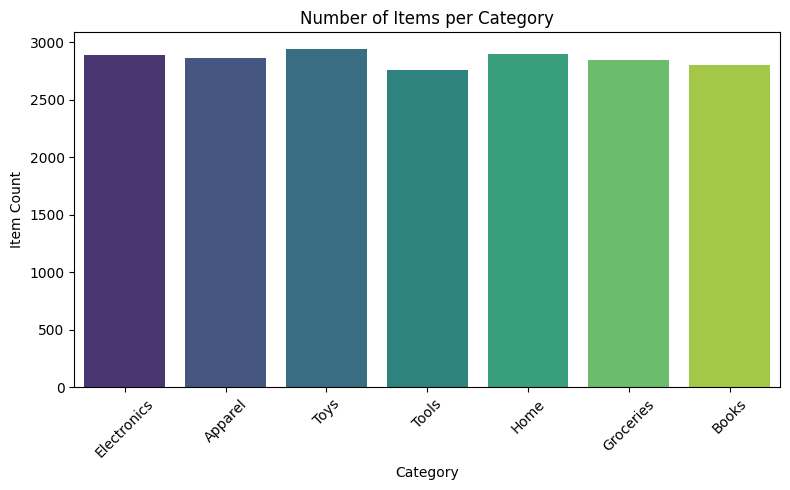

C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_13700\2602201913.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[a[0] for a in sorted_aisles], y=[a[1] for a in sorted_aisles], palette="mako")


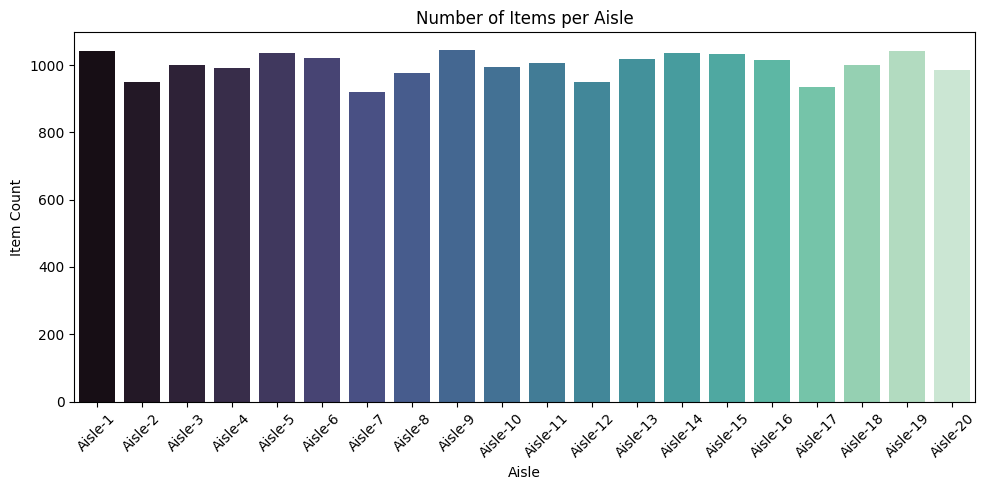

In [3]:
# ==== CONFIG ====
INPUT_FILE = "warehouse_items.csv"

# ==== READ CSV ====
items = []
categories = []
aisles = []

with open(INPUT_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        items.append(row['ItemID'])
        categories.append(row['Category'])
        aisles.append(row['Aisle'])

# ==== STATISTICS ====
total_items = len(items)
category_count = Counter(categories)
aisle_count = Counter(aisles)

# ==== PLOTS ====

## 1. Bar plot: Items per Category
plt.figure(figsize=(8, 5))
sns.barplot(x=list(category_count.keys()), y=list(category_count.values()), palette="viridis")
plt.title("Number of Items per Category")
plt.xlabel("Category")
plt.ylabel("Item Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Bar plot: Items per Aisle
plt.figure(figsize=(10, 5))
sorted_aisles = sorted(aisle_count.items(), key=lambda x: int(x[0].split("-")[1]))
sns.barplot(x=[a[0] for a in sorted_aisles], y=[a[1] for a in sorted_aisles], palette="mako")
plt.title("Number of Items per Aisle")
plt.xlabel("Aisle")
plt.ylabel("Item Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [4]:
# ==== CONFIG ====
SEED = 41
CSV_INPUT_FILE = "warehouse_items.csv"
CSV_OUTPUT_FILE = "generated_orders_24h.csv"
EXP_LAMBDA = 0.288            # Mean inter-arrival time
MEAN_ORDER_SIZE = 5           # Poisson mean
SIMULATION_DURATION = 24 * 60  # 24 hours in minutes

random.seed(SEED)
np.random.seed(SEED)

# ==== LOAD ITEM DATA ====
items = []
with open(CSV_INPUT_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        items.append({
            'ItemID': row['ItemID'],
            'Aisle': row['Aisle'],
            'Category': row['Category'],
            'Name': row['ItemName']
        })

# ==== HELPER FUNCTION: Extract aisle number for sorting ====
def aisle_number(aisle_string):
    try:
        return int(aisle_string.split('-')[1])
    except:
        return float('inf')  # fallback if something is wrong

# ==== GENERATE ORDERS UNTIL TIME LIMIT ====
orders = []
current_time = 0
order_id = 1

while current_time < SIMULATION_DURATION:
    inter_arrival = np.random.exponential(scale=1 / EXP_LAMBDA)
    current_time += inter_arrival
    if current_time > SIMULATION_DURATION:
        break

    order_size = np.random.poisson(MEAN_ORDER_SIZE)
    selected_items = random.sample(items, min(order_size, len(items)))
    selected_items.sort(key=lambda item: aisle_number(item['Aisle']))

    for item in selected_items:
        aisle_num = aisle_number(item['Aisle'])
        aisle_location = (aisle_num * 3) - 1

        orders.append({
            'OrderID': f"ORDER{order_id:04d}",
            'TimestampMin': round(current_time, 2),
            'ItemID': item['ItemID'],
            'Aisle': item['Aisle'],
            'Category': item['Category'],
            'AisleLocation': aisle_location
        })

    order_id += 1

# ==== WRITE TO CSV ====
fieldnames = ['OrderID', 'TimestampMin', 'ItemID', 'Aisle', 'Category', 'AisleLocation']
with open(CSV_OUTPUT_FILE, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(orders)

print(f"✅ Generated {len(orders)} order lines across {order_id - 1} orders. Saved to {CSV_OUTPUT_FILE}")


✅ Generated 2086 order lines across 418 orders. Saved to generated_orders_24h.csv



📦 General Statistics
Total Orders:             415
Total Items:              2086
Mean Items per Order:     5.03
Std. Dev Items per Order: 2.15
Mean IAT (min):           3.47
Std. Dev IAT (min):       3.41


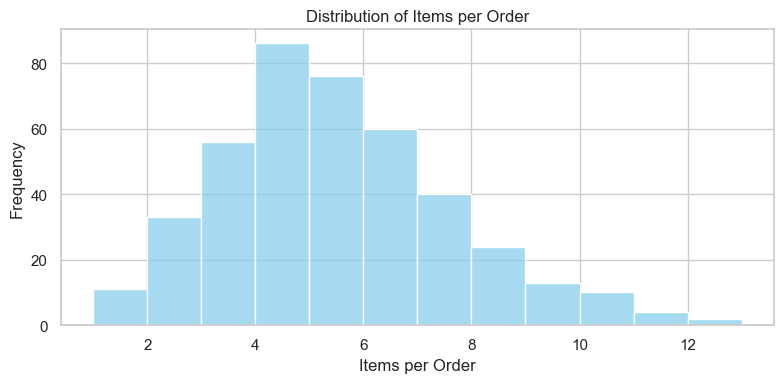

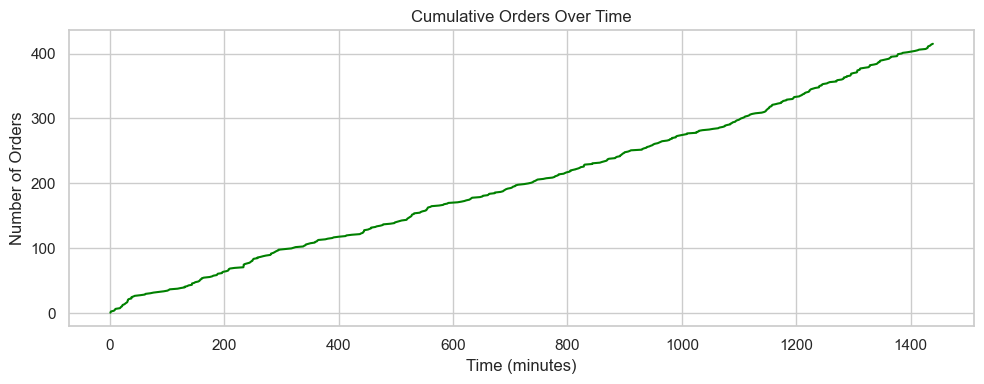

C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_13700\4234789364.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette="viridis")


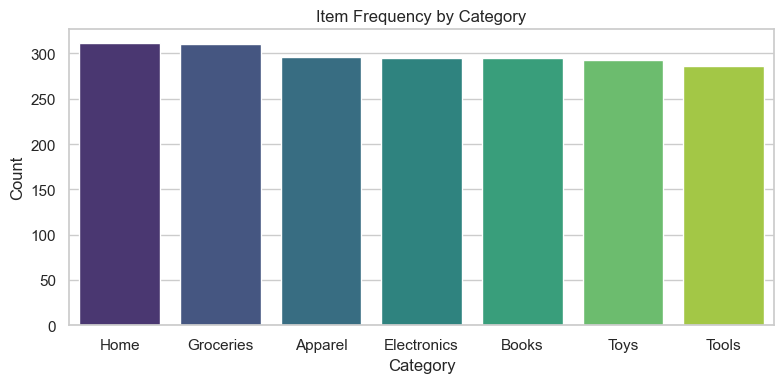

In [5]:
# Load data
df = pd.read_csv("generated_orders_24h.csv")

# Convert order timestamp to float
df['TimestampMin'] = df['TimestampMin'].astype(float)

# ========== DESCRIPTIVE STATISTICS ==========

# Items per order
items_per_order = df.groupby('OrderID').size()

# Inter-arrival time: difference between timestamps of consecutive orders
order_times = df.drop_duplicates('OrderID')[['OrderID', 'TimestampMin']].sort_values('TimestampMin')
inter_arrival_times = order_times['TimestampMin'].diff().dropna()

print("\n📦 General Statistics")
print(f"Total Orders:             {df['OrderID'].nunique()}")
print(f"Total Items:              {len(df)}")
print(f"Mean Items per Order:     {items_per_order.mean():.2f}")
print(f"Std. Dev Items per Order: {items_per_order.std():.2f}")
print(f"Mean IAT (min):           {inter_arrival_times.mean():.2f}")
print(f"Std. Dev IAT (min):       {inter_arrival_times.std():.2f}")

# ========== PLOTS ==========

sns.set(style="whitegrid")

# Histogram: Items per order
plt.figure(figsize=(8, 4))
sns.histplot(items_per_order, bins=range(1, items_per_order.max()+2), kde=False, color="skyblue")
plt.title("Distribution of Items per Order")
plt.xlabel("Items per Order")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Line Plot: Cumulative Orders over Time
plt.figure(figsize=(10, 4))
order_times['CumulativeOrders'] = range(1, len(order_times)+1)
sns.lineplot(x='TimestampMin', y='CumulativeOrders', data=order_times, color="green")
plt.title("Cumulative Orders Over Time")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# Bar Plot: Orders by Category
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette="viridis")
plt.title("Item Frequency by Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


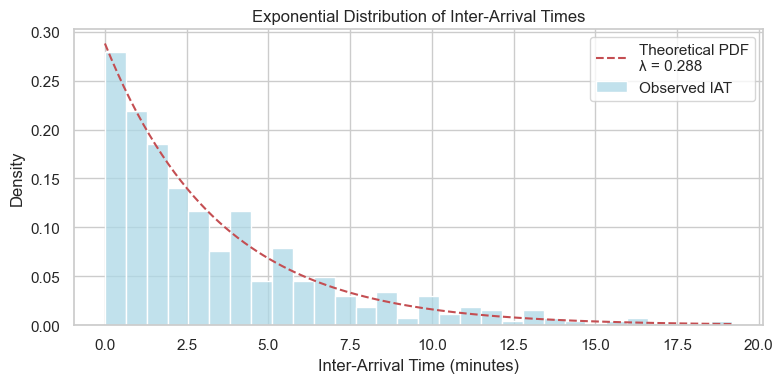

In [6]:
from scipy.stats import expon

# Extract inter-arrival times
order_times = df.drop_duplicates('OrderID')[['OrderID', 'TimestampMin']].sort_values('TimestampMin')
inter_arrival_times = order_times['TimestampMin'].diff().dropna()

# Calculate lambda from sample mean
sample_lambda = 1 / inter_arrival_times.mean()

# Create x values for PDF
x = np.linspace(0, inter_arrival_times.max(), 100)
pdf = expon.pdf(x, scale=1/sample_lambda)

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(inter_arrival_times, bins=30, kde=False, stat="density", color="lightblue", label="Observed IAT")
plt.plot(x, pdf, 'r--', label=f"Theoretical PDF\nλ = {sample_lambda:.3f}")
plt.title("Exponential Distribution of Inter-Arrival Times")
plt.xlabel("Inter-Arrival Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()
